In [1]:
import os, glob
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from util import *
from distance import *
from draw import draw_configuration

### Read data

In [2]:
#directory = 'data'
directory = ''
pattern = os.path.join(directory, f'Nsmall=*_Nstep=*.dat')
files = glob.glob(pattern)
files = sorted(files, key=lambda x: read_parameters(x)[0])

In [3]:
print(files)

['Nsmall=200_Nstep=50.dat', 'Nsmall=300_Nstep=50.dat', 'Nsmall=400_Nstep=50.dat', 'Nsmall=500_Nstep=50.dat', 'Nsmall=600_Nstep=50.dat', 'Nsmall=700_Nstep=50.dat', 'Nsmall=800_Nstep=50.dat', 'Nsmall=900_Nstep=50.dat', 'Nsmall=1000_Nstep=50.dat', 'Nsmall=1100_Nstep=50.dat', 'Nsmall=1200_Nstep=50.dat', 'Nsmall=1300_Nstep=50.dat', 'Nsmall=1400_Nstep=50.dat', 'Nsmall=1500_Nstep=50.dat', 'Nsmall=1600_Nstep=50.dat', 'Nsmall=1700_Nstep=50.dat', 'Nsmall=1800_Nstep=50.dat', 'Nsmall=1900_Nstep=50.dat', 'Nsmall=2000_Nstep=50.dat', 'Nsmall=2100_Nstep=50.dat', 'Nsmall=2200_Nstep=50.dat', 'Nsmall=2300_Nstep=50.dat', 'Nsmall=2400_Nstep=50.dat', 'Nsmall=2500_Nstep=50.dat', 'Nsmall=2600_Nstep=50.dat', 'Nsmall=2700_Nstep=50.dat', 'Nsmall=2800_Nstep=50.dat', 'Nsmall=2900_Nstep=50.dat', 'Nsmall=3000_Nstep=50.dat', 'Nsmall=3100_Nstep=50.dat', 'Nsmall=3200_Nstep=50.dat', 'Nsmall=3300_Nstep=50.dat', 'Nsmall=3350_Nstep=50.dat', 'Nsmall=3400_Nstep=50.dat', 'Nsmall=3450_Nstep=50.dat', 'Nsmall=3500_Nstep=50.dat',

### Measure average nearest distance

In [4]:
N_big = 16
size_box = 7
size_big = 1
size_small = 0.05

In [5]:
nearest_behavior = []
density = []
for filename in files:
    positions = read_positions(filename)
    N_small, step = read_parameters(filename)
    density.append(N_small*(size_small)**2/(size_box)**2)
    N_iter = len(positions) * step
    nearest = []
    for i in range(len(positions)):
        nearest.append((i*step, average_nearest_distance(positions[i][:N_big])))
    nearest_behavior.append(nearest)

In [6]:
nearest_behavior = np.array(nearest_behavior)
density = np.array(density)
N_sample = len(nearest_behavior)

In [7]:
# to understand data structure
print(len(nearest_behavior))
print(len(nearest_behavior[1]))
print(len(nearest_behavior[1][1]))
print(nearest_behavior[1])
np.shape(nearest_behavior)

60
201
2
[[0.00000000e+00 1.25000000e+00]
 [5.00000000e+01 1.34738808e+00]
 [1.00000000e+02 1.29837188e+00]
 [1.50000000e+02 1.27301611e+00]
 [2.00000000e+02 1.26022409e+00]
 [2.50000000e+02 1.23401259e+00]
 [3.00000000e+02 1.32732483e+00]
 [3.50000000e+02 1.31378860e+00]
 [4.00000000e+02 1.27024883e+00]
 [4.50000000e+02 1.26585953e+00]
 [5.00000000e+02 1.31147507e+00]
 [5.50000000e+02 1.25284212e+00]
 [6.00000000e+02 1.32551869e+00]
 [6.50000000e+02 1.26734345e+00]
 [7.00000000e+02 1.25025036e+00]
 [7.50000000e+02 1.30133686e+00]
 [8.00000000e+02 1.33442555e+00]
 [8.50000000e+02 1.30043956e+00]
 [9.00000000e+02 1.28700334e+00]
 [9.50000000e+02 1.30641720e+00]
 [1.00000000e+03 1.28962064e+00]
 [1.05000000e+03 1.26709191e+00]
 [1.10000000e+03 1.23904570e+00]
 [1.15000000e+03 1.24860212e+00]
 [1.20000000e+03 1.28840968e+00]
 [1.25000000e+03 1.28980546e+00]
 [1.30000000e+03 1.21471967e+00]
 [1.35000000e+03 1.34823934e+00]
 [1.40000000e+03 1.21206161e+00]
 [1.45000000e+03 1.29602112e+00]
 

(60, 201, 2)

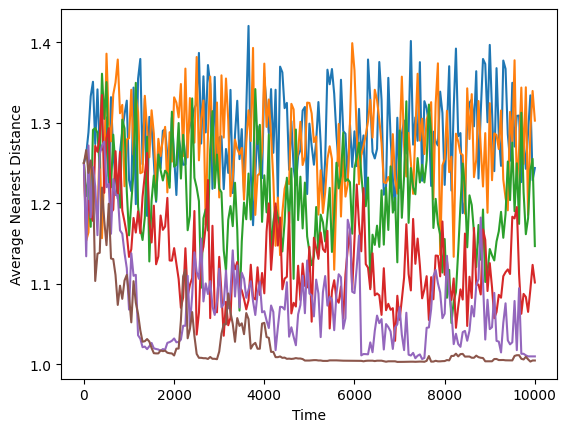

In [8]:
for i in range(0, N_sample, 10):
    plt.plot(nearest_behavior[i][:,0], nearest_behavior[i][:,1])
    plt.xlabel("Time")
    plt.ylabel("Average Nearest Distance")

Text(0, 0.5, 'Average Nearest Distance')

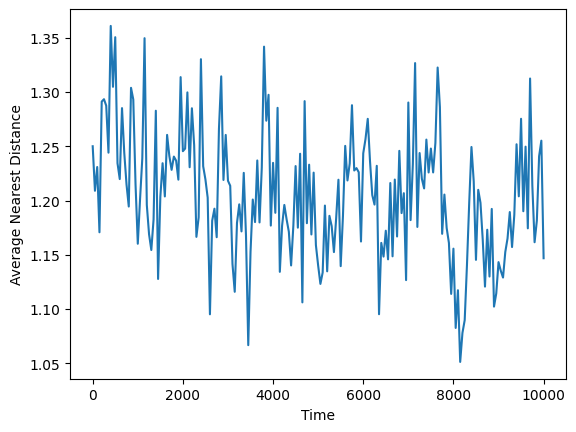

In [9]:
plt.plot(nearest_behavior[20][:,0], nearest_behavior[20][:,1])
plt.xlabel("Time")
plt.ylabel("Average Nearest Distance")

### Exponential decay fitting to get converged value of average nearest distance

In [10]:
def exponential_decay(t, a, b, c):
    return a * np.exp(-t/b) + c

In [11]:
fit_results = []
initial = (1, 100, 1)
bounds = ((0, 0, 0), (10000, 10000, 10000))
for i in range(N_sample):
    t = nearest_behavior[i][:,0]
    x = nearest_behavior[i][:,1]
    fit_params, pcov = curve_fit(exponential_decay, t, x, p0=initial, bounds=bounds)
    fit_results.append(fit_params)

In [12]:
fit_results = np.array(fit_results)
correlation_time = fit_results[:,1]
converged_distance = fit_results[:,2]

Amplitude = 0.11783220495333473
Correlation Time = 809.0364277513745
Saturation = 1.1712732620000665


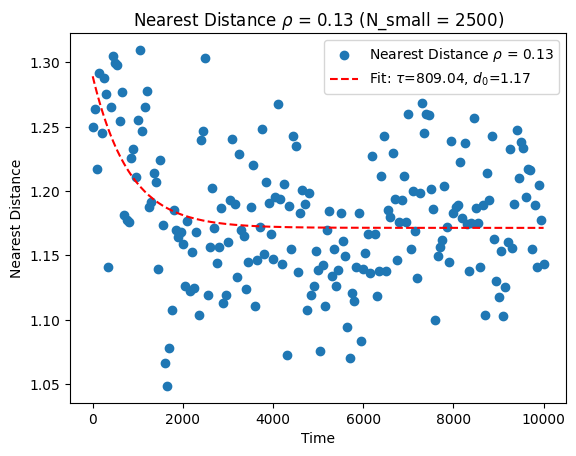

In [22]:
i = 23
plt.scatter(nearest_behavior[i][:,0], nearest_behavior[i][:,1], label=rf"Nearest Distance $\rho$ = {density[i]:.2f}")
plt.plot(nearest_behavior[i][:,0], exponential_decay(nearest_behavior[i][:,0], *fit_results[i]), 'r--', label=rf"Fit: $\tau$={correlation_time[i]:.2f}, $d_0$={converged_distance[i]:.2f}")
plt.title(rf"Nearest Distance $\rho$ = {density[i]:.2f} (N_small = {density[i] * (size_box/size_small)**2:.0f})")
plt.xlabel("Time")
plt.ylabel("Nearest Distance")
plt.legend()
print(rf'Amplitude = {fit_results[i][0]}')
print(rf'Correlation Time = {correlation_time[i]}')
print(rf'Saturation = {converged_distance[i]}')
plt.savefig(f'nearest_distance_N_small={i*100+200}.pdf', format='pdf')

### Fit power law to nearest distance vs density and observe critical phenomena

In [14]:
def power_law(T, A, Tc, beta, offset):
    result = np.zeros_like(T) + offset
    result[T<=Tc] += A*np.power(Tc-T[T<=Tc], beta)
    return result

In [15]:
initial = (0.3, 0.25, 0.1, 1)
bounds = ((0, 0, 0, 0), (size_box/2, 1, 10, size_box/2))
(Ac, Nc, beta, offset), fit_goodness = curve_fit(power_law, density, converged_distance, p0=initial, bounds=bounds)

In [16]:
print(Nc, beta, offset)
print(fit_goodness)

0.19535219040102958 0.6671665662312188 1.015905857983415
[[ 4.28276390e-03  8.93874616e-05  2.46653506e-03  1.63407009e-05]
 [ 8.93874616e-05  5.27406566e-06  5.78669458e-05 -2.08882402e-06]
 [ 2.46653506e-03  5.78669458e-05  1.51655815e-03  2.73929294e-05]
 [ 1.63407009e-05 -2.08882402e-06  2.73929294e-05  1.12145410e-05]]


In [17]:
indices = np.where(converged_distance < 1)
print(indices)

(array([], dtype=int64),)


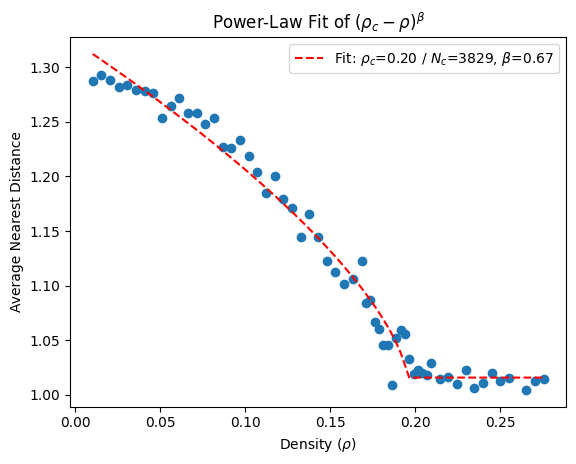

In [18]:
plt.scatter(density, converged_distance)
plt.plot(density, power_law(density, Ac, Nc, beta, offset), 'r--', \
          label=rf'Fit: $\rho_c$={Nc:.2f} / $N_c$={Nc*(size_box/size_small)**2:.0f}, $\beta$={beta:.2f}')
plt.xlabel(rf'Density $(\rho)$')
plt.ylabel('Average Nearest Distance')
plt.title(rf'Power-Law Fit of $(\rho_c-\rho)^\beta$')
plt.legend()
plt.savefig('powerlaw-fit.pdf', format='pdf')

Text(0, 0.5, 'Correlation Time (Iteration)')

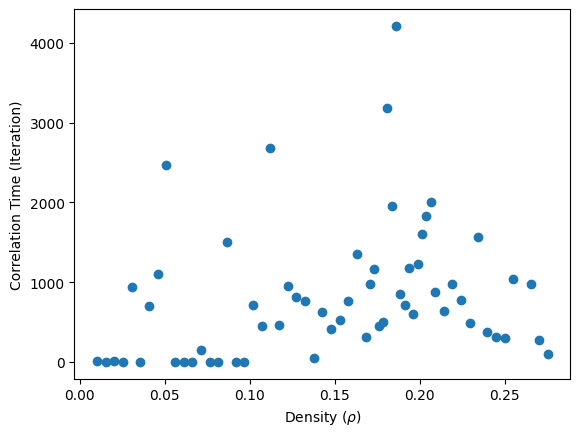

In [19]:
plt.scatter(density, fit_results[:,1])
plt.xlabel(rf'Density $(\rho)$')
plt.ylabel('Correlation Time (Iteration)')

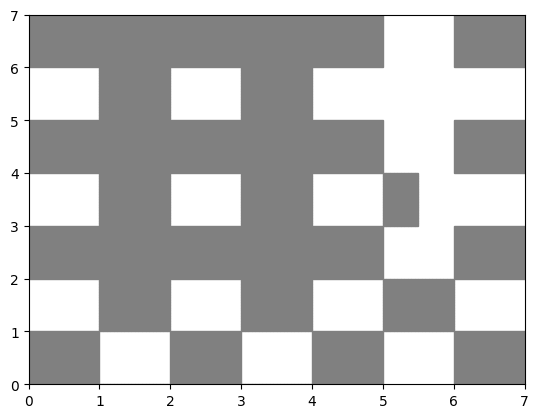

In [20]:
fig_initial, ax_initial = plt.subplots()
initial_config = read_positions(files[-1])
draw_configuration(ax_initial, initial_config[0])
plt.savefig('initial_config.pdf', format='pdf')